# Weights Prediction

General Steps to Calculate the AIDI

1.
Data Collection: Gather data for each infrastructure sector represented by the composite indices (Transport, Electricity, ICT, and Water and Sanitation).

2.
Normalization: Normalize the data for each composite index to ensure they are on a comparable scale. This often involves scaling the values to a range between 0 and 1.

3.
Weighting: Assign weights to each composite index based on their importance or contribution to overall infrastructure development. The sum of all weights should equal 1.

4.
Aggregation: Combine the weighted indices to compute the overall AIDI.

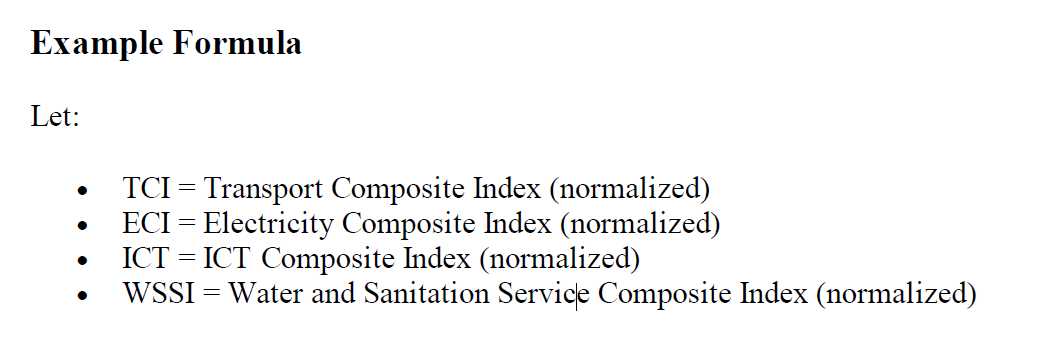

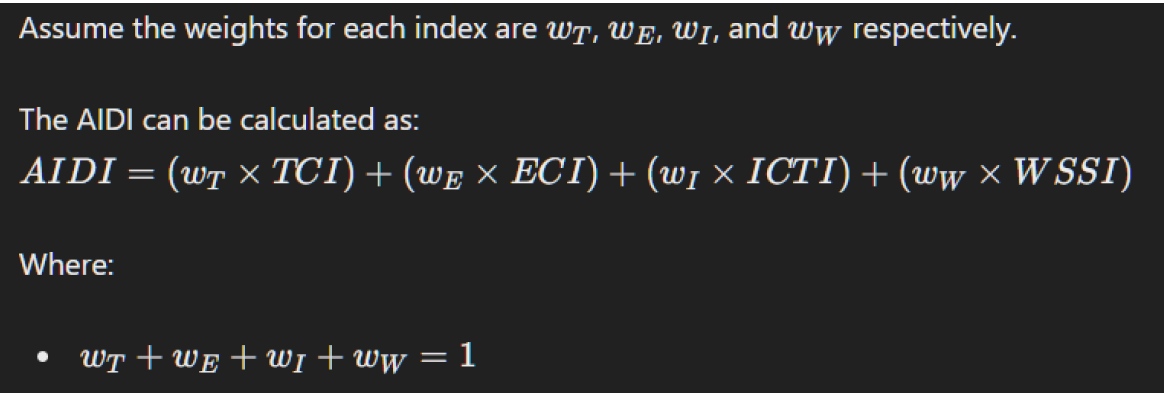

In [ ]:
combined_df.head()

,Country,aidi_mean%,tci_mean%,eci_mean%,ici_mean%,wssci_mean%
0,Algeria,45.63,18.11,22.83,14.64,96.03
1,Angola,14.63,2.55,3.91,5.16,54.67
2,Benin,13.19,5.38,0.38,5.88,47.84
3,Botswana,33.52,25.51,12.12,12.99,85.53
4,Burkina Faso,15.20,11.77,0.93,4.70,51.50


In [ ]:
combined_df.columns

Index(['Country', 'aidi_mean%', 'tci_mean%', 'eci_mean%', 'ici_mean%',
       'wssci_mean%'],
      dtype='object')

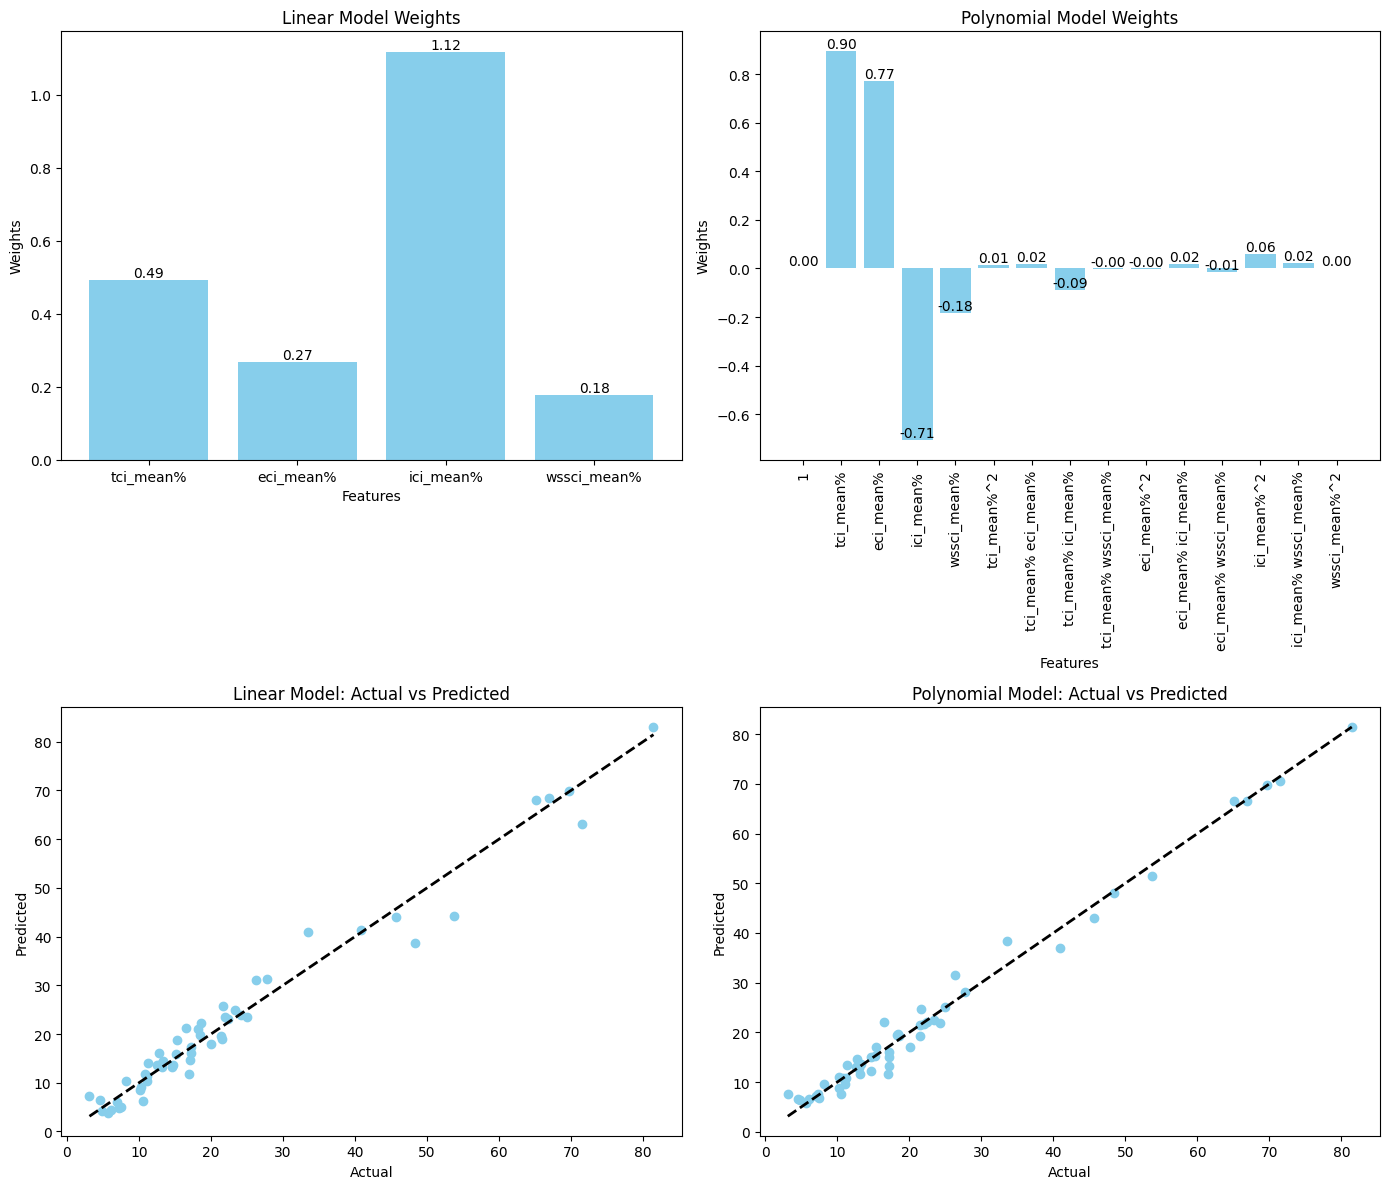

Model Metrics:
        Model       MAE        MSE        R2
0      Linear  2.449437  10.820870  0.969063
1  Polynomial  1.592191   4.847955  0.986140

Linear Model Weights:
       Feature  Linear_Weights
0    tci_mean%        0.491745
1    eci_mean%        0.267508
2    ici_mean%        1.118285
3  wssci_mean%        0.178581

Polynomial Model Weights:
                  Feature  Polynomial_Weights
0                       1            0.000000
1               tci_mean%            0.895769
2               eci_mean%            0.773104
3               ici_mean%           -0.707887
4             wssci_mean%           -0.183463
5             tci_mean%^2            0.014732
6     tci_mean% eci_mean%            0.018063
7     tci_mean% ici_mean%           -0.090465
8   tci_mean% wssci_mean%           -0.003781
9             eci_mean%^2           -0.003754
10    eci_mean% ici_mean%            0.016441
11  eci_mean% wssci_mean%           -0.013532
12            ici_mean%^2            0.059676
1

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Create DataFrame
df = combined_df

# Independent variables
X = df[['tci_mean%', 'eci_mean%', 'ici_mean%',
       'wssci_mean%']]

# Dependent variable
y = df['aidi_mean%']

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_y_pred = linear_model.predict(X)
linear_weights = linear_model.coef_

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_y_pred = poly_model.predict(X_poly)
poly_weights = poly_model.coef_

# Evaluation metrics
metrics = {
    'Model': ['Linear', 'Polynomial'],
    'MAE': [
        mean_absolute_error(y, linear_y_pred),
        mean_absolute_error(y, poly_y_pred)
    ],
    'MSE': [
        mean_squared_error(y, linear_y_pred),
        mean_squared_error(y, poly_y_pred)
    ],
    'R2': [
        r2_score(y, linear_y_pred),
        r2_score(y, poly_y_pred)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Weights DataFrame
linear_weights_df = pd.DataFrame({
    'Feature': ['tci_mean%', 'eci_mean%', 'ici_mean%','wssci_mean%'],
    'Linear_Weights': linear_weights
})

poly_features = poly.get_feature_names_out(['tci_mean%', 'eci_mean%', 'ici_mean%','wssci_mean%'])
poly_weights_df = pd.DataFrame({
    'Feature': poly_features,
    'Polynomial_Weights': poly_weights
})

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Linear model weights
axes[0, 0].bar(linear_weights_df['Feature'], linear_weights_df['Linear_Weights'], color='skyblue')
for i, v in enumerate(linear_weights_df['Linear_Weights']):
    axes[0, 0].text(i, v, f"{v:.2f}", ha='center', va='bottom')
axes[0, 0].set_title('Linear Model Weights')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Weights')

# Polynomial model weights
axes[0, 1].bar(poly_weights_df['Feature'], poly_weights_df['Polynomial_Weights'], color='skyblue')
for i, v in enumerate(poly_weights_df['Polynomial_Weights']):
    axes[0, 1].text(i, v, f"{v:.2f}", ha='center', va='bottom')
axes[0, 1].set_title('Polynomial Model Weights')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Weights')
axes[0, 1].tick_params(axis='x', rotation=90)

# Actual vs Predicted for Linear model
axes[1, 0].scatter(y, linear_y_pred, color='skyblue')
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[1, 0].set_title('Linear Model: Actual vs Predicted')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

# Actual vs Predicted for Polynomial model
axes[1, 1].scatter(y, poly_y_pred, color='skyblue')
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[1, 1].set_title('Polynomial Model: Actual vs Predicted')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

print("Model Metrics:")
print(metrics_df)
print("\nLinear Model Weights:")
print(linear_weights_df)
print("\nPolynomial Model Weights:")
print(poly_weights_df)


## Modeling & Evaluation

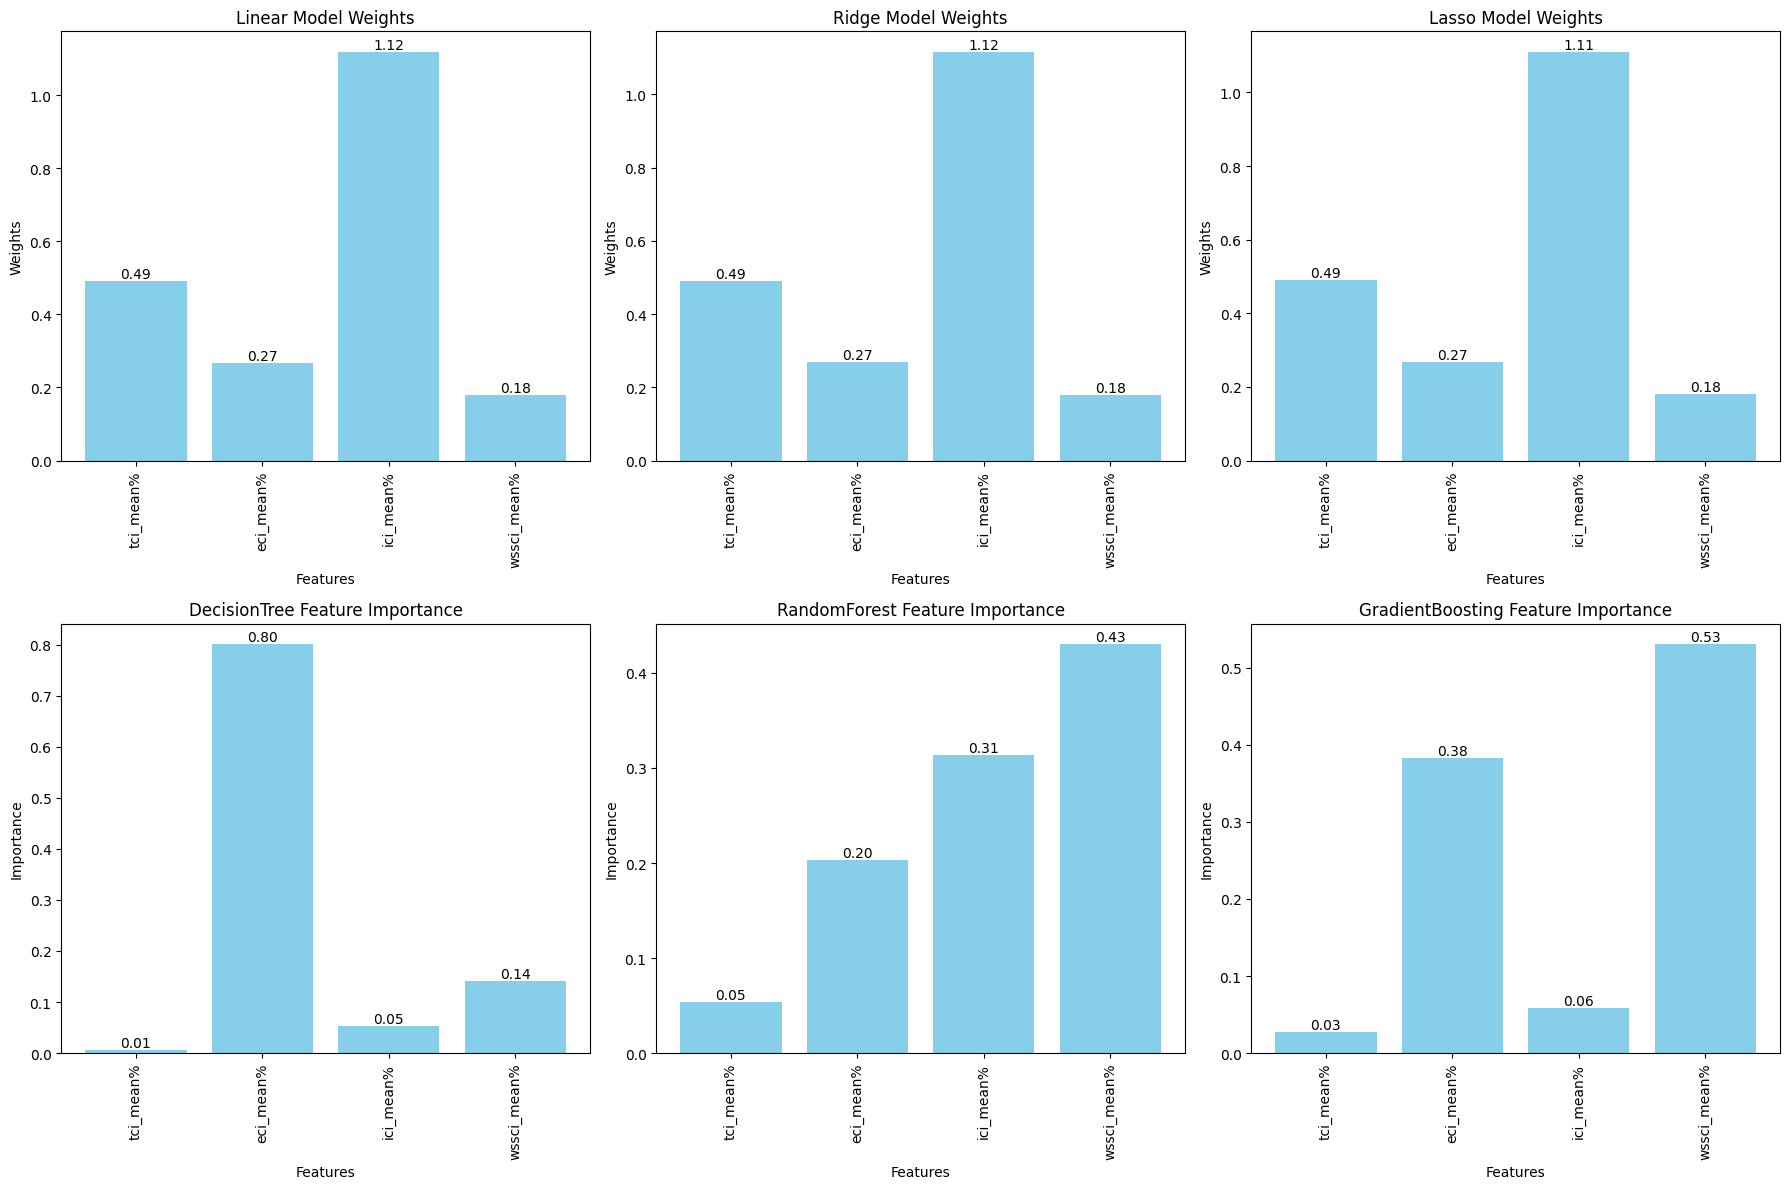

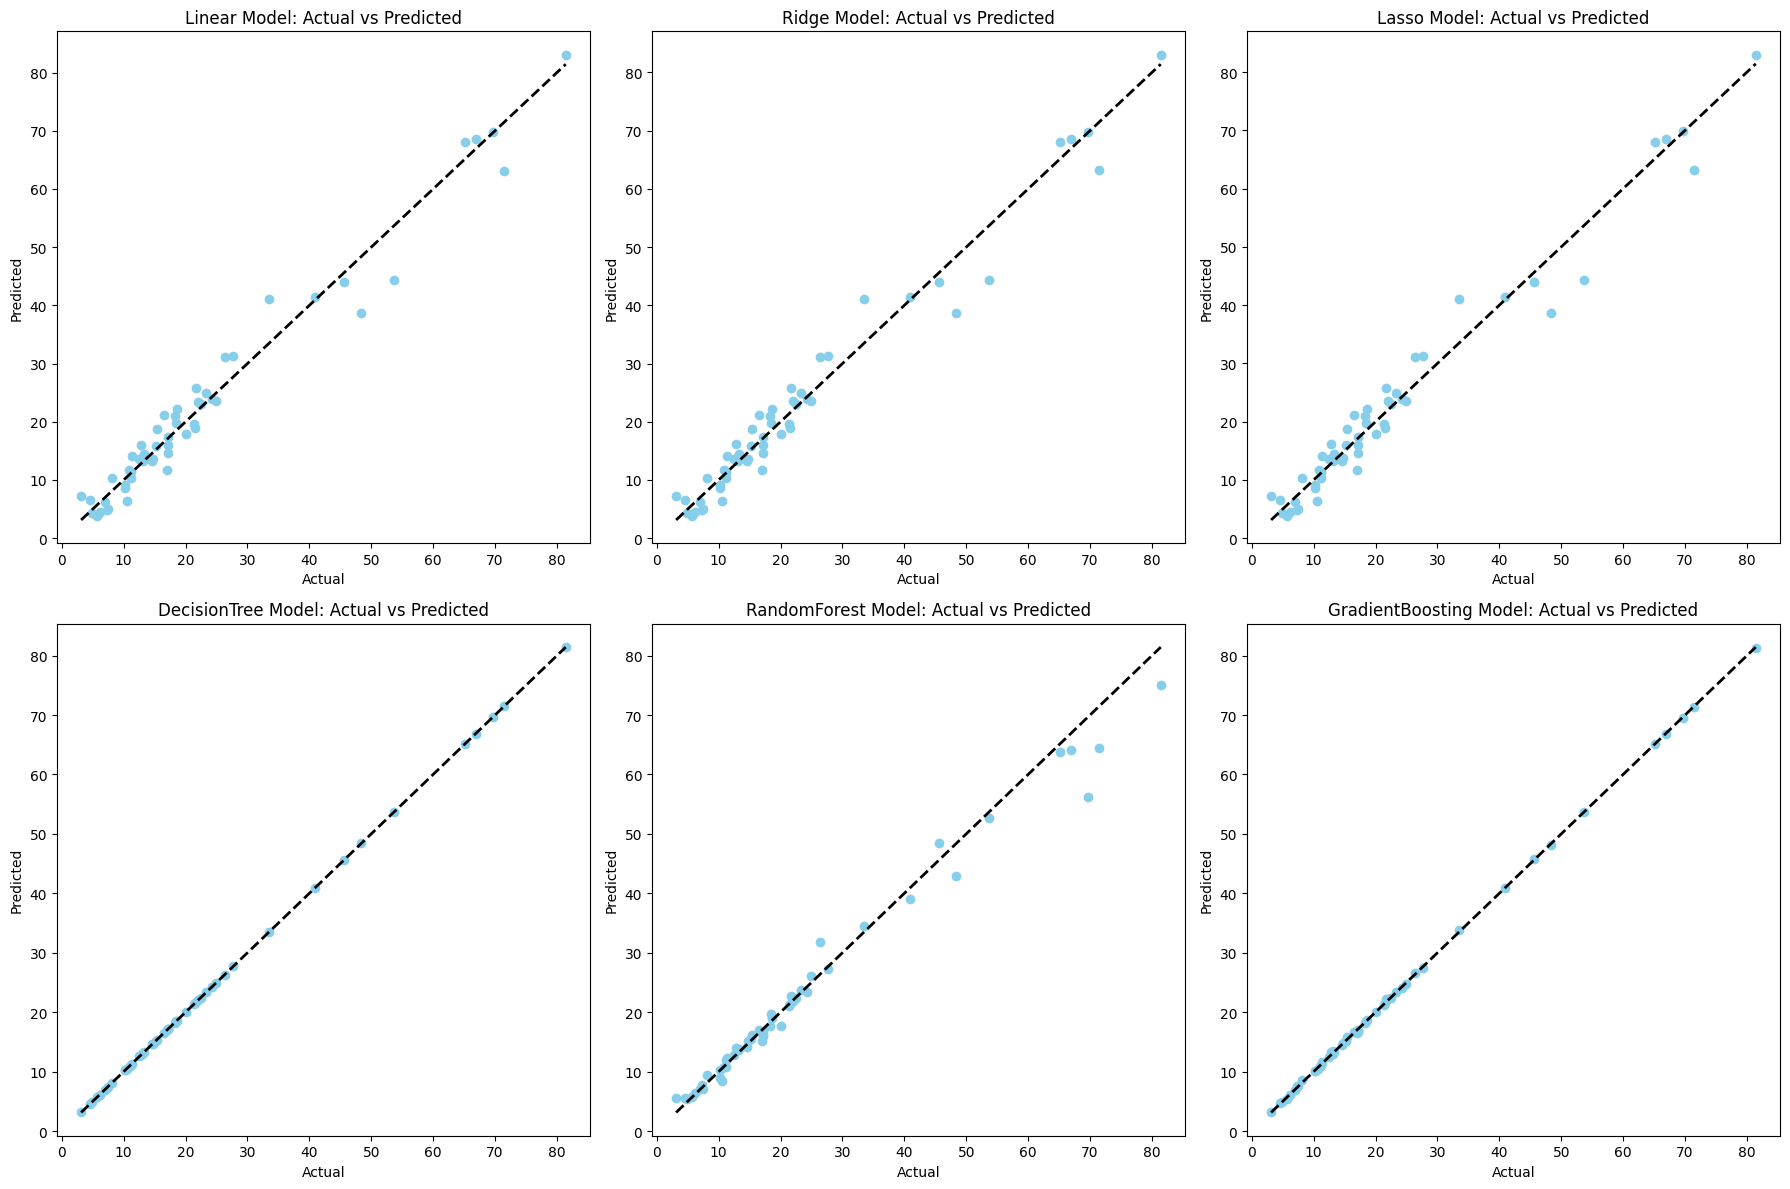

Model Metrics:
              Model       MAE        MSE        R2
0            Linear  2.449437  10.820870  0.969063
1             Ridge  2.449123  10.820916  0.969063
2             Lasso  2.447170  10.821497  0.969061
3      DecisionTree  0.000000   0.000000  1.000000
4      RandomForest  1.479533   7.244072  0.979289
5  GradientBoosting  0.176827   0.051425  0.999853

Weights:
       Feature  Linear_Weights  Ridge_Weights  Lasso_Weights  \
0    tci_mean%        0.491745       0.491536       0.490700   
1    eci_mean%        0.267508       0.267860       0.268635   
2    ici_mean%        1.118285       1.116008       1.110250   
3  wssci_mean%        0.178581       0.179010       0.180076   

   DecisionTree_Feature_Importance  RandomForest_Feature_Importance  \
0                         0.005967                         0.053339   
1                         0.800596                         0.203355   
2                         0.052695                         0.313142   
3            

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create DataFrame
df = combined_df

# Independent variables
X = df[['tci_mean%', 'eci_mean%', 'ici_mean%', 'wssci_mean%']]

# Dependent variable
y = df['aidi_mean%']

# Initialize models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, max_iter=10000),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100)
}

# Store results
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}
weights = {'Feature': ['tci_mean%', 'eci_mean%', 'ici_mean%', 'wssci_mean%']}
predictions = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    predictions[name + '_Predictions'] = y_pred
    metrics['Model'].append(name)
    metrics['MAE'].append(mean_absolute_error(y, y_pred))
    metrics['MSE'].append(mean_squared_error(y, y_pred))
    metrics['R2'].append(r2_score(y, y_pred))
    if name in ['Linear', 'Ridge', 'Lasso']:
        weights[name + '_Weights'] = model.coef_
    elif name == 'DecisionTree':
        weights[name + '_Feature_Importance'] = model.feature_importances_
    elif name in ['RandomForest', 'GradientBoosting']:
        weights[name + '_Feature_Importance'] = model.feature_importances_

# Create DataFrames
metrics_df = pd.DataFrame(metrics)
weights_df = pd.DataFrame(weights)
predictions_df = pd.DataFrame(predictions)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, name in enumerate(models.keys()):
    row, col = divmod(i, 3)
    if name in ['Linear', 'Ridge', 'Lasso']:
        axes[row, col].bar(weights_df['Feature'], weights_df[name + '_Weights'], color='skyblue')
        axes[row, col].set_title(f'{name} Model Weights')
        axes[row, col].set_xlabel('Features')
        axes[row, col].set_ylabel('Weights')
        axes[row, col].tick_params(axis='x', rotation=90)
        for j, v in enumerate(weights_df[name + '_Weights']):
            axes[row, col].text(j, v, f"{v:.2f}", ha='center', va='bottom')
    elif name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
        axes[row, col].bar(weights_df['Feature'], weights_df[name + '_Feature_Importance'], color='skyblue')
        axes[row, col].set_title(f'{name} Feature Importance')
        axes[row, col].set_xlabel('Features')
        axes[row, col].set_ylabel('Importance')
        axes[row, col].tick_params(axis='x', rotation=90)
        for j, v in enumerate(weights_df[name + '_Feature_Importance']):
            axes[row, col].text(j, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting actual vs predicted
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, name in enumerate(models.keys()):
    row, col = divmod(i, 3)
    y_pred = predictions_df[name + '_Predictions']
    axes[row, col].scatter(y, y_pred, color='skyblue')
    axes[row, col].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axes[row, col].set_title(f'{name} Model: Actual vs Predicted')
    axes[row, col].set_xlabel('Actual')
    axes[row, col].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

print("Model Metrics:")
print(metrics_df)
print("\nWeights:")
print(weights_df)


## Cross Validation

Model Metrics:
              Model    CV_MAE     CV_MSE     CV_R2
0            Linear  2.887383  16.766052  0.947218
1             Ridge  2.882711  16.716096  0.947346
2             Lasso  2.878852  16.695416  0.947409
3      DecisionTree  5.982545  93.695217  0.709041
4      RandomForest  3.825795  46.394047  0.861811
5  GradientBoosting  4.665361  60.472735  0.812592

Weights:
       Feature    Linear
0    tci_mean%  0.491745
1    eci_mean%  0.267508
2    ici_mean%  1.118285
3  wssci_mean%  0.178581
       Feature     Ridge
0    tci_mean%  0.491536
1    eci_mean%  0.267860
2    ici_mean%  1.116008
3  wssci_mean%  0.179010
       Feature     Lasso
0    tci_mean%  0.490700
1    eci_mean%  0.268635
2    ici_mean%  1.110250
3  wssci_mean%  0.180076
       Feature  DecisionTree
0    tci_mean%      0.006265
1    eci_mean%      0.041739
2    ici_mean%      0.053709
3  wssci_mean%      0.898287
       Feature  RandomForest
0    tci_mean%      0.026998
1    eci_mean%      0.256272
2    ici_me

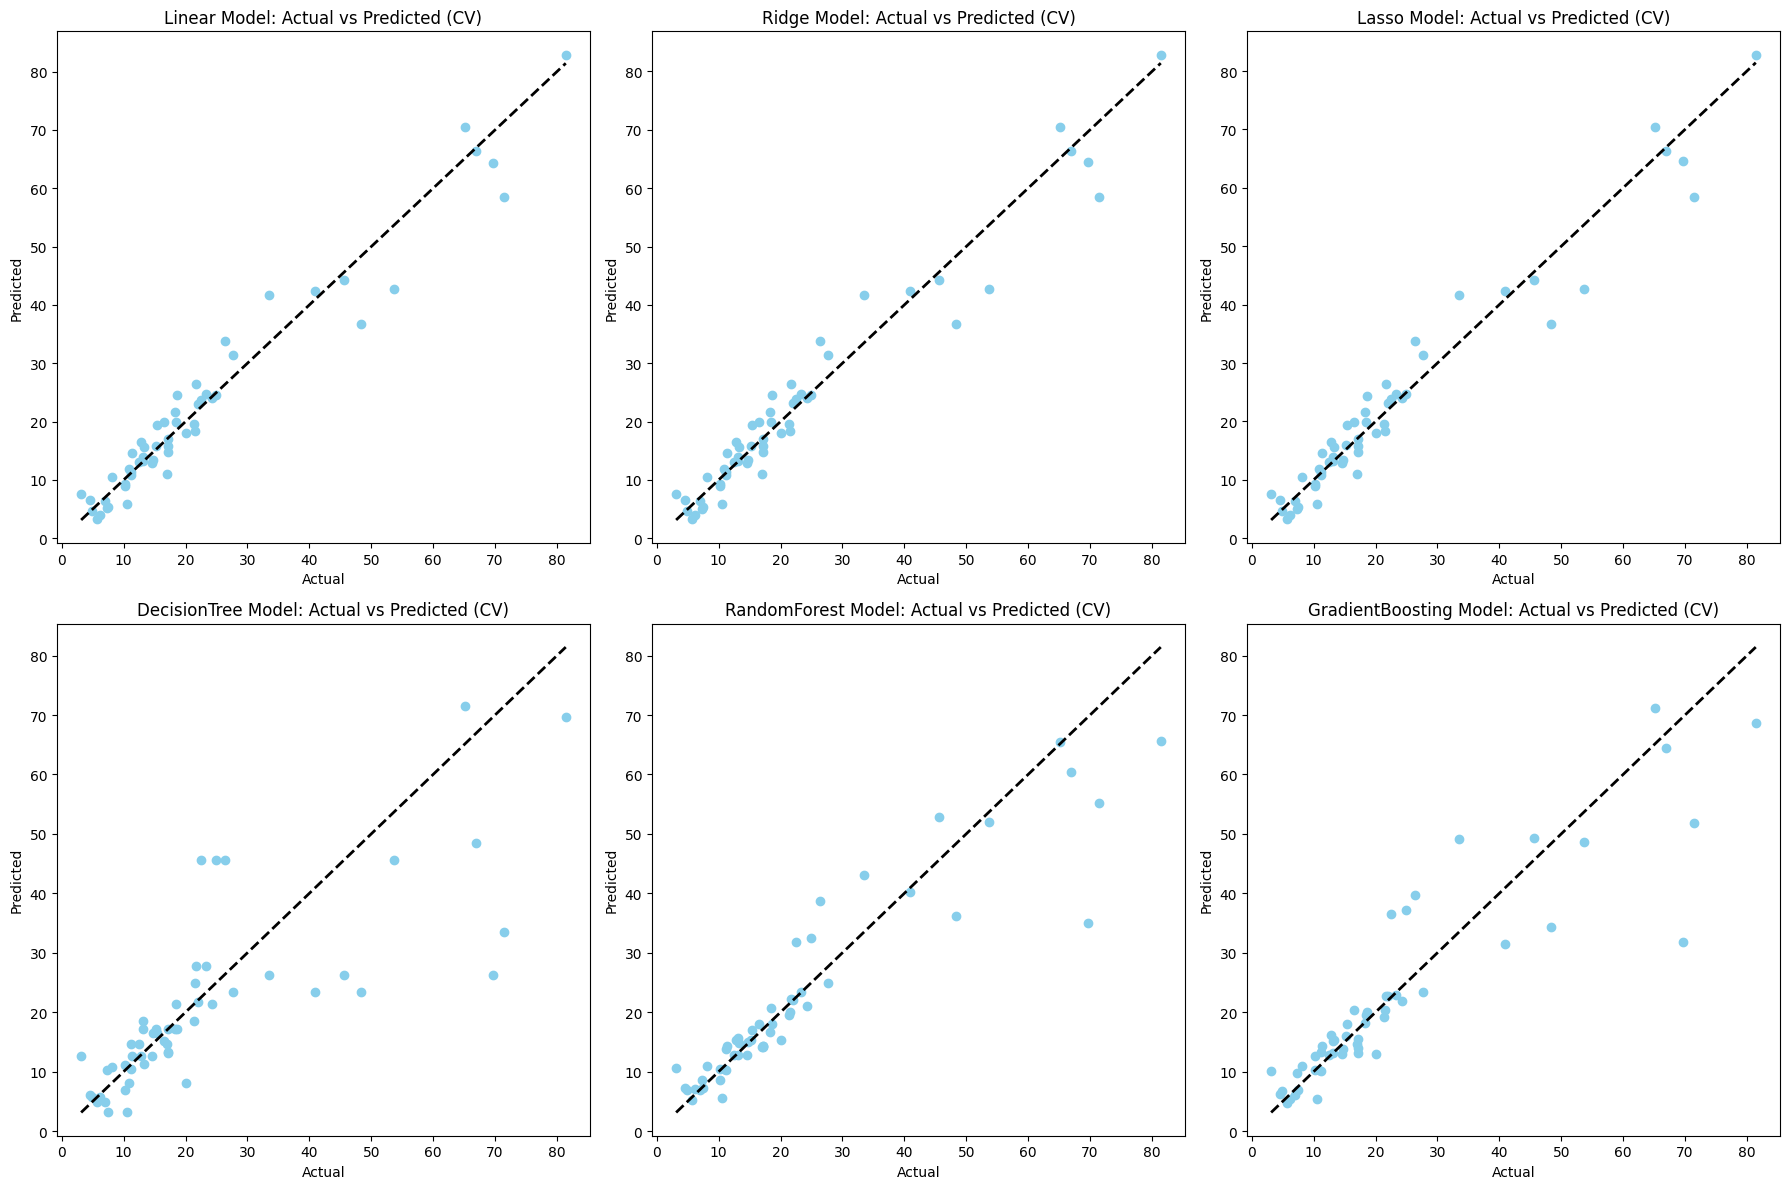

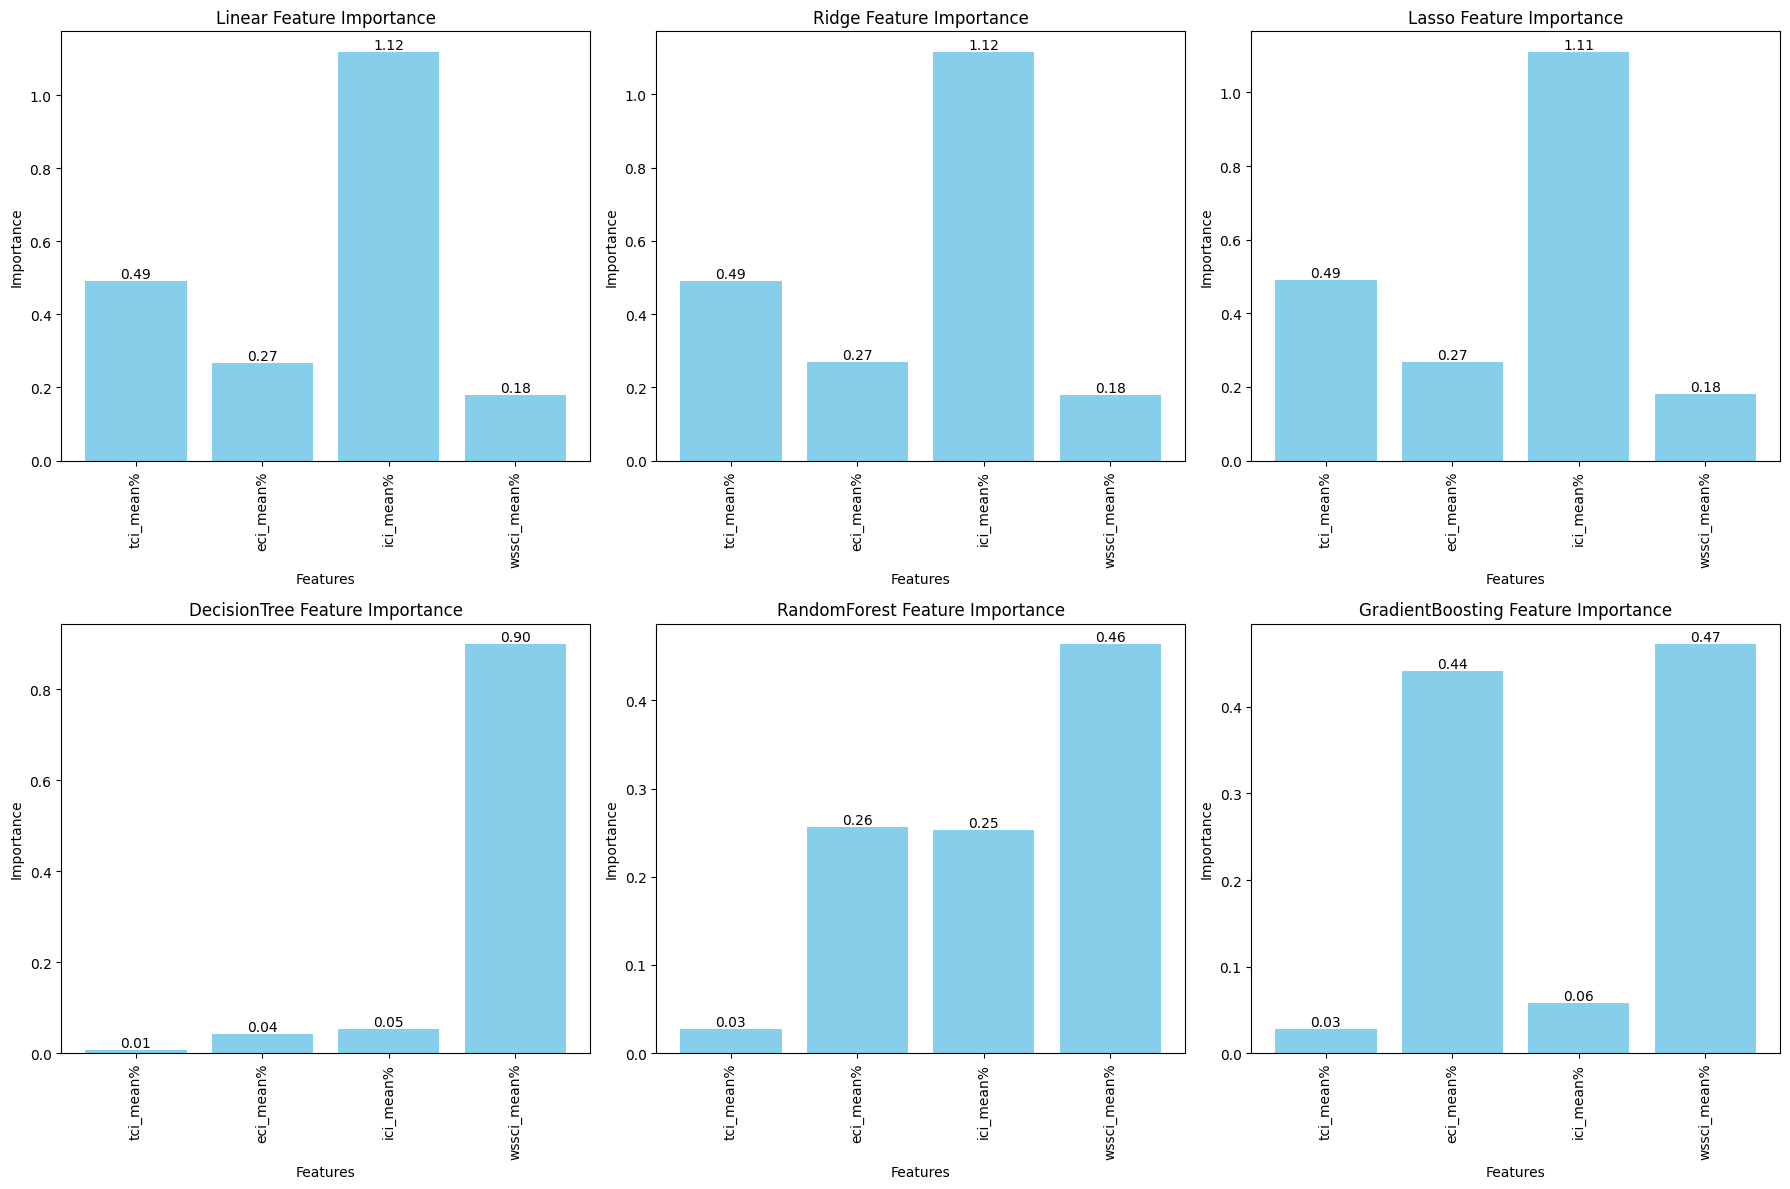

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create DataFrame
df = combined_df

# Independent variables
X = df[['tci_mean%', 'eci_mean%', 'ici_mean%', 'wssci_mean%']]

# Dependent variable
y = df['aidi_mean%']

# Initialize models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, max_iter=10000),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100)
}

# Store results
metrics = {'Model': [], 'CV_MAE': [], 'CV_MSE': [], 'CV_R2': []}
weights = {}

# Perform cross-validation
for name, model in models.items():
    # Perform cross-validation with 5 folds
    cv_mae = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
    cv_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    metrics['Model'].append(name)
    metrics['CV_MAE'].append(cv_mae)
    metrics['CV_MSE'].append(cv_mse)
    metrics['CV_R2'].append(cv_r2)

    # Get feature weights for Linear, Ridge, and Lasso
    if name in ['Linear', 'Ridge', 'Lasso']:
        model.fit(X, y)
        weights_df = pd.DataFrame({'Feature': X.columns, name: model.coef_})
    elif name == 'DecisionTree':
        model.fit(X, y)
        weights_df = pd.DataFrame({'Feature': X.columns, name: model.feature_importances_})
    else:
        model.fit(X, y)  # Fit the model
        weights_df = pd.DataFrame({'Feature': X.columns, name: model.feature_importances_})
    weights[name] = weights_df

# Create DataFrames
metrics_df = pd.DataFrame(metrics)

# Print Metrics DataFrame
print("Model Metrics:")
print(metrics_df)

# Print Weights DataFrame
print("\nWeights:")
for name, weights_df in weights.items():
    print(weights_df)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (name, model) in enumerate(models.items()):
    row, col = divmod(i, 3)
    predictions = cross_val_predict(model, X, y, cv=5)
    axes[row, col].scatter(y, predictions, color='skyblue')
    axes[row, col].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axes[row, col].set_title(f'{name} Model: Actual vs Predicted (CV)')
    axes[row, col].set_xlabel('Actual')
    axes[row, col].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

## Plotting weights
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (name, weights_df) in enumerate(weights.items()):
    row, col = divmod(i, 3)
    if 'Weights' in name:
        axes[row, col].bar(weights_df['Feature'], weights_df[name], color='skyblue')
        axes[row, col].set_title(f'{name.replace("_Weights", "")} Model Weights')
        axes[row, col].set_xlabel('Features')
        axes[row, col].set_ylabel('Weights')
        axes[row, col].tick_params(axis='x', rotation=90)
        for j, v in enumerate(weights_df[name]):
            axes[row, col].text(j, v, f"{v:.2f}", ha='center', va='bottom')
    else:
        axes[row, col].bar(weights_df['Feature'], weights_df[name], color='skyblue')
        axes[row, col].set_title(f'{name} Feature Importance')
        axes[row, col].set_xlabel('Features')
        axes[row, col].set_ylabel('Importance')
        axes[row, col].tick_params(axis='x', rotation=90)
        for j, v in enumerate(weights_df[name]):
            axes[row, col].text(j, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Predictions

In [ ]:
import warnings

def predict_aidi_for_country(country_name, model, df):
    # Extract feature values for the specified country
    country_features = df[df['Country'] == country_name][['tci_mean%', 'eci_mean%', 'ici_mean%', 'wssci_mean%']].values

    # Make prediction for the specified country
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        country_prediction = model.predict(country_features)

    return country_prediction

#Rplace Country_Name
country_name = 'Nigeria'

actual_aidi = df[df['Country'] == country_name]['aidi_mean%'].values[0]
predicted_aidi = predict_aidi_for_country(country_name, linear_model, df)
print(f"Actual AIDI mean% for {country_name}: {actual_aidi}")
print(f"Predicted AIDI mean% for {country_name}: {predicted_aidi[0]}")


Actual AIDI mean% for Nigeria: 17.16
Predicted AIDI mean% for Nigeria: 17.403057634833875
